# Capstone

For our capstone we constructed a machine learning model that could predict if there is a tumor using brain MRI scans as our inputs. The dataset we will be using can be found on Kaggle. We had an original data size of 253 MRI scans. We did some data augmentation and were able increase our data size to 1012 images. For our model we used a convolutional neural network. our model had an average of about 90% accuracy that is still being tested along with multiple other aspects of our dataset. 

## Loading Data

In [1]:
# creates dir for kaggle 
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [2]:
# Download Data
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection
!ls

 33% 5.00M/15.1M [00:00<00:00, 35.0MB/s]
100% 15.1M/15.1M [00:00<00:00, 74.0MB/s]
brain-mri-images-for-brain-tumor-detection.zip	sample_data


In [3]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

---

## Exploratory Data Analysis

In [4]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import random
import math

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import ImageOps, Image
from matplotlib import cm

In [5]:
all_data_dir = pathlib.Path('/content/brain_tumor_dataset')
yes_dir = pathlib.Path('/content/yes')
no_dir = pathlib.Path('/content/no')

In [6]:
dataCount = len(list(all_data_dir.glob('*')))
print(dataCount)
yesCount = len(list(yes_dir.glob('*')))
print(yesCount)
noCount = len(list(no_dir.glob('*')))
print(noCount)

2
155
98


In [7]:
image_count = len(list(all_data_dir.glob('*/*')))
print(image_count)

253


In [8]:
target_height = 150
target_width = 150

In [9]:
image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(target_height, target_width),
    directory=all_data_dir,
    batch_size=128,
    image_data_generator=None)

Found 253 images belonging to 2 classes.


In [10]:
# def rescale(img):
#   img = np.array(img)
#   low = np.percentile(img, 1.5)
#   high = np.percentile(img, 99.5)
#   # print(low, high)
#   img[img<low] = 0.
#   img[img>high] = high
#   img = img/high
#   return img

In [11]:
def normalize(img):
  result = np.zeros_like(img)
  for i in range(3):
    result[:,:,i][img[:,:,i]>0.5] = (img[:,:,i][img[:,:,i]>0.5] - np.mean(img[:,:,i][img[:,:,i]>0.5]))/np.std(img[:,:,i][img[:,:,i]>0.5])
  return result

In [12]:
arr = image_iterator.filepaths

j=0

for i in arr: 
  image = i
  img = PIL.Image.open(image)
  img = img.convert('RGB')
  img = img.resize((target_height, target_width), Image.ANTIALIAS)
  # img = normalize(img)

  flip = ImageOps.flip(img)
  mirror = ImageOps.mirror(img)
  rotate180 = img.rotate(180)
  rotate90 = img.rotate(90)
  rotate270 = img.rotate(270)

  # if j < 10:
  #   plt.figure()
  #   plt.imshow(img)
  #   # plt.imshow((img==0)*1., alpha=0.5)
  # #   plt.figure()
  # #   plt.imshow(flip)
  # #   plt.figure()
  # #   plt.imshow(mirror)
  # #   plt.figure()
  # #   plt.imshow(rotate)
  #   j += 1
  new = i.strip('.jpeg')
  new = new.strip('.jpg')
  new = new.strip('.png')

  flip_name = new + '-flipped.jpeg'
  mirror_name = new + '-mirror.jpeg'
  rotate180_name = new + '-rotate-180.jpeg'
  rotate90_name = new + '-rotate-90.jpeg'
  rotate270_name = new + '-rotate-270.jpeg'

  flip.save(flip_name)
  mirror.save(mirror_name)
  rotate180.save(rotate180_name)
  rotate90.save(rotate90_name)
  rotate270.save(rotate270_name)
  # overwrites resized image into dir
  # img = Image.fromarray(np.uint8(cm.gist_earth(img)*255))
  img.save(i)


In [13]:
from numpy import asarray

arr = image_iterator.filepaths

for i in arr:
  # load image
  image = Image.open(i)
  pixels = asarray(image)
  # confirm pixel range is 0-255
  print('Data Type: %s' % pixels.dtype)
  print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
  print(pixels.shape)
  a = normalize(pixels)
  # convert from integers to floats
  # pixels = pixels.astype('float32')
  # normalize to the range 0-1
  # pixels /= 255.0
  # confirm the normalization
  print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 225.000
(150, 150, 3)
Min: 0.000, Max: 225.000
Data Type: uint8
Min: 0.000, Max: 135.000
(150, 150, 3)
Min: 0.000, Max: 135.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000, Max: 209.000
(150, 150, 3)
Min: 0.000, Max: 209.000
Data Type: uint8
Min: 0.000, Max: 255.000
(150, 150, 3)
Min: 0.000, Max: 255.000
Data Type: uint8
Min: 0.000,

In [14]:
import cv2
j = 0

for i in arr:
  image = cv2.imread(i)
  
  # Grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  mask = np.zeros_like(gray)
  ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  # cv2.drawContours(gray,contours,-1,(0,255,0),2)
  # print(contours)
  # raise
  # plt.imshow(gray)
  # plt.plot(contours[0][:,0,0],contours[0][:,0,1], c="r")
  cv2.fillPoly(mask, pts=contours, color=(255,255,255))

  gray[mask==0] = 0 

  # this is your data
  img = np.expand_dims(gray, axis=2)
  cv2.imwrite(i, img)
  # plt.imshow(gray)
  # print(gray)
  # plt.imshow(mask, alpha=.5)
  # plt.figure()


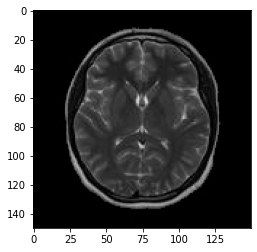

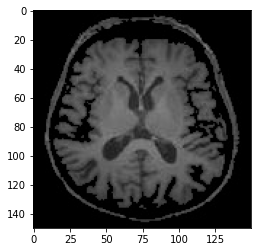

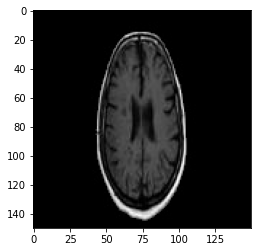

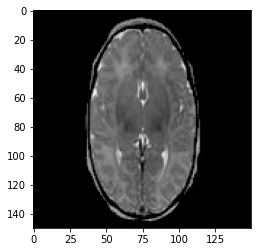

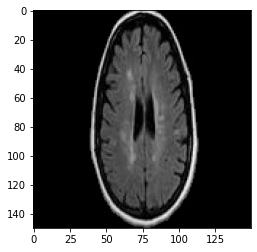

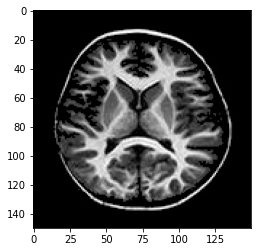

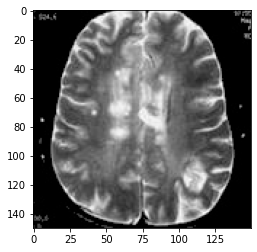

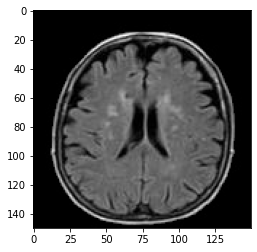

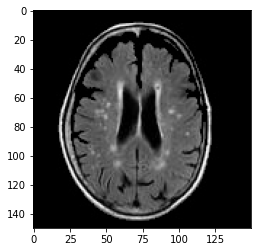

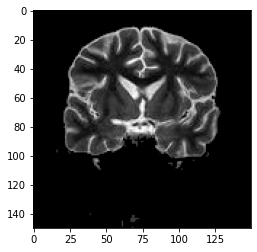

<Figure size 432x288 with 0 Axes>

In [15]:
j = 0
for i in arr:
  if j < 10:
    image = cv2.imread(i)
    plt.imshow(image)
    plt.figure()
  j += 1

In [16]:
image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(target_height, target_width),
    directory=all_data_dir,
    batch_size=128,
    image_data_generator=None)

Found 1513 images belonging to 2 classes.


## Splitting Data

In [17]:
split_size = .2
batch_size = np.round(image_iterator.n * split_size)
print(batch_size)

303.0


In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  all_data_dir,
  #labels=None,
  validation_split=split_size,
  subset="training",
  seed=123,
  image_size=(target_height, target_width),
  batch_size=batch_size)

Found 1513 files belonging to 2 classes.
Using 1211 files for training.


In [19]:
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_labels.size

1211

In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  all_data_dir,
  #labels=None,
  validation_split=split_size,
  subset="validation",
  seed=123,
  image_size=(target_height, target_width),
  batch_size=batch_size)

Found 1513 files belonging to 2 classes.
Using 302 files for validation.


In [21]:
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_labels.size

302

In [22]:
val_labels

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [23]:
class_names = train_ds.class_names
print('train class names =', class_names)
class_names = val_ds.class_names
print('val class names =', class_names)

train class names = ['no', 'yes']
val class names = ['no', 'yes']


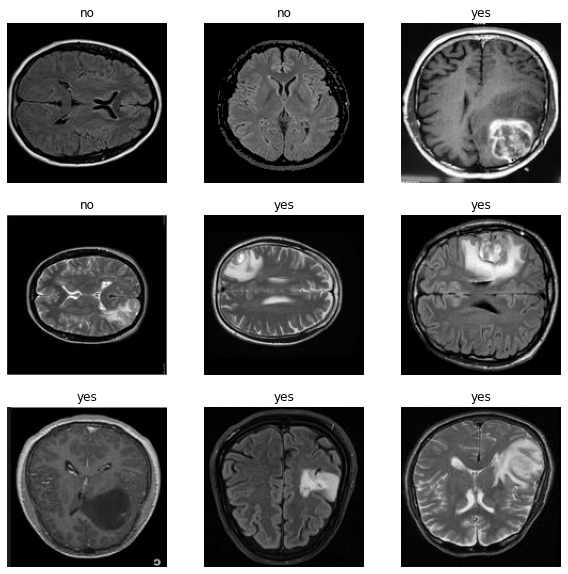

In [24]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  img = image_batch[i].numpy()
  plt.imshow(img.astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

## Build And Train Model

In [25]:
num_classes = 1

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(target_height, target_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [27]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience= 15)

In [28]:
epochs=50

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=early_stop
)

Epoch 1/50
4/4 [==============================] - 21s 908ms/step - loss: 0.6420 - accuracy: 0.6268 - val_loss: 0.5436 - val_accuracy: 0.7450
Epoch 2/50
4/4 [==============================] - 1s 219ms/step - loss: 0.5079 - accuracy: 0.7861 - val_loss: 0.5573 - val_accuracy: 0.7285
Epoch 3/50
4/4 [==============================] - 1s 220ms/step - loss: 0.5018 - accuracy: 0.7803 - val_loss: 0.5465 - val_accuracy: 0.7815
Epoch 4/50
4/4 [==============================] - 1s 224ms/step - loss: 0.4829 - accuracy: 0.7911 - val_loss: 0.5063 - val_accuracy: 0.7649
Epoch 5/50
4/4 [==============================] - 1s 222ms/step - loss: 0.4611 - accuracy: 0.8109 - val_loss: 0.4901 - val_accuracy: 0.7914
Epoch 6/50
4/4 [==============================] - 1s 220ms/step - loss: 0.4352 - accuracy: 0.8167 - val_loss: 0.4805 - val_accuracy: 0.7682
Epoch 7/50
4/4 [==============================] - 1s 223ms/step - loss: 0.4139 - accuracy: 0.8282 - val_loss: 0.4567 - val_accuracy: 0.8179
Epoch 8/50
4/4 [===

## Checking Model Accuracy

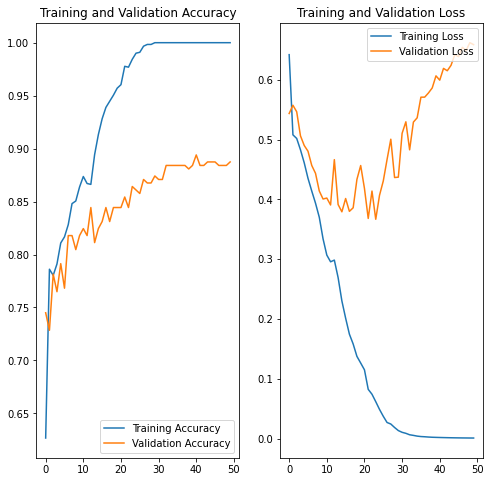

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model.evaluate(val_ds)

1/1 [==============================] - 0s 143ms/step - loss: 0.6587 - accuracy: 0.8874


[0.6587187051773071, 0.887417197227478]

## Predictions

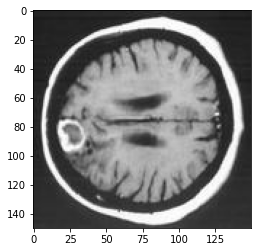

Prediction: [1.]
Actual: tf.Tensor(1, shape=(), dtype=int32)


In [31]:
image_batch, label_batch = next(iter(val_ds))

num = random.randint(0, len(image_batch)-1)
plt.imshow(image_batch[num].numpy().astype('uint8'))
plt.show()
predictions = model.predict(image_batch)
rounded_predictions = abs(np.round(predictions + .25))
# print(predictions)
# print(rounded_predictions)
#rounded_labels = np.argmax(label_batch)
# print(label_batch)

print('Prediction:', rounded_predictions[num])
print('Actual:', label_batch[num])

In [32]:
print('\nclassification report:')
print(classification_report(label_batch, rounded_predictions))


classification report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       121
           1       0.87      0.95      0.91       181

    accuracy                           0.88       302
   macro avg       0.89      0.87      0.88       302
weighted avg       0.89      0.88      0.88       302



confusion matrix:


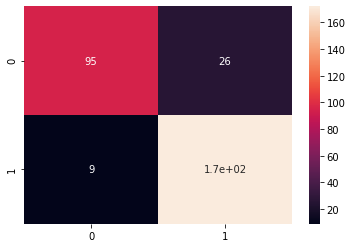

In [33]:
print('confusion matrix:')
cm = confusion_matrix(label_batch, rounded_predictions)
sns.heatmap(cm, xticklabels=[0, 1], yticklabels=[0,1], annot=True)